# Introduction to Computer Vision (ECSE 415)
# Assignment 1: Image Filtering
### Question 2.1: Edge detection - Sobel edge detector
### Author: Antonios Valkanas

In [1]:
# Import useful libraries
import math, cv2
import numpy as np
import matplotlib.pyplot as plt

### 2.1.1 Apply a Sobel edge detector to the image 'rice'. Use the following thresholds: 150 and 200. Use kernel size of 3. Apply a Sobel edge detector to the two previously-sharpened images with the same threshold. Comment on the effectiveness of using sharpening prior to the edge detection.

In [2]:
# Read in image from file in grayscale.
rice_pic = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

# Calculate sharpened rice images
rice_pic_gauss_filter = cv2.GaussianBlur(rice_pic, (5,5), math.sqrt(2))
rice_pic_kernel = np.ones((5,5), dtype = np.float32)/25
rice_pic_box_filter = cv2.filter2D(rice_pic, -1, rice_pic_kernel)

# Sharpen similirly to the previous part of the assingment.
rice_pic_gauss = rice_pic + (rice_pic - rice_pic_gauss_filter)
rice_pic_box = rice_pic + (rice_pic - rice_pic_box_filter)

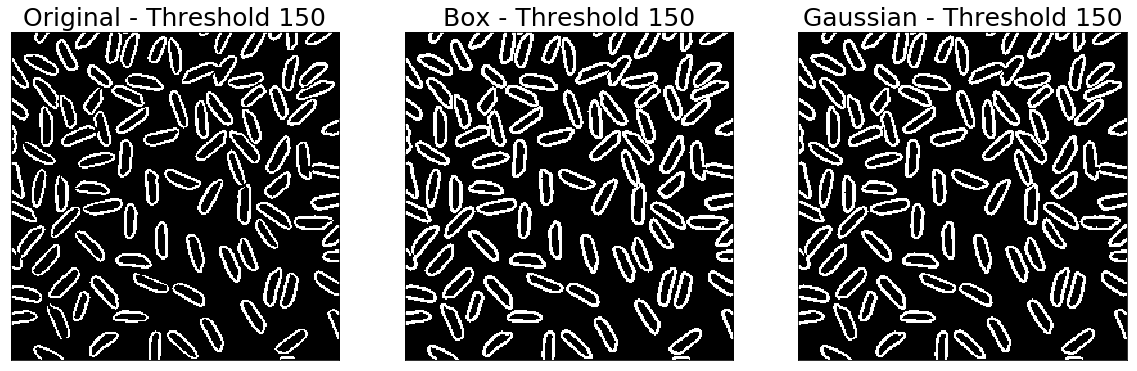

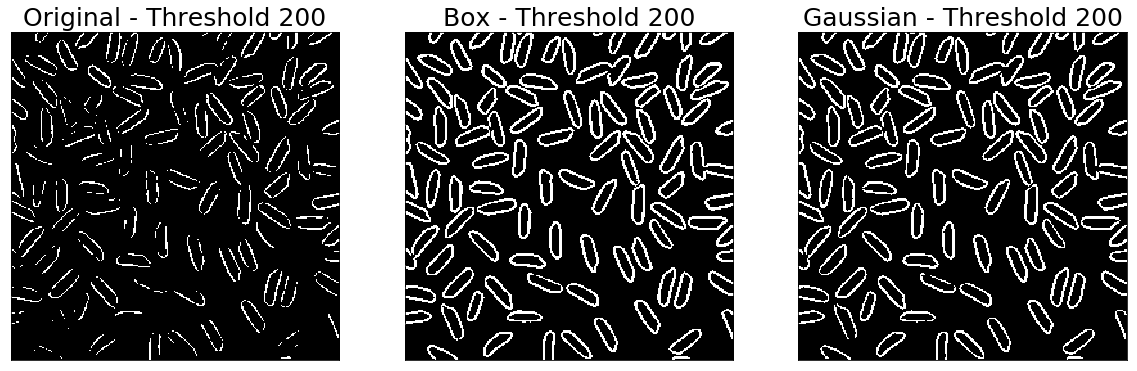

In [3]:
# Apply the Sobel Edge using the 150 and 200 threshold.
# First compute the gradient along the x and y directions.

# Original picture without sharpening
rice_pic_sobel_x = cv2.Sobel(rice_pic, cv2.CV_64F, 1, 0, ksize=3)
rice_pic_sobel_y = cv2.Sobel(rice_pic, cv2.CV_64F, 0, 1, ksize=3)
# Gaussian sharpened Sobel edge
gauss_rice_pic_sobel_x = cv2.Sobel(rice_pic_gauss, cv2.CV_64F, 1, 0, ksize=3)
gauss_rice_pic_sobel_y = cv2.Sobel(rice_pic_gauss, cv2.CV_64F, 0, 1, ksize=3)
# Box sharpened Sobel edge
box_rice_pic_sobel_x = cv2.Sobel(rice_pic_box, cv2.CV_64F, 1, 0, ksize=3)
box_rice_pic_sobel_y = cv2.Sobel(rice_pic_box, cv2.CV_64F, 0, 1, ksize=3)

# Then compute the magnitude

# Original picture without sharpening
rice_pic_mag = cv2.magnitude(rice_pic_sobel_x, rice_pic_sobel_y)
# Gaussian sharpened Sobel edge
gauss_rice_pic_mag = cv2.magnitude(gauss_rice_pic_sobel_x, gauss_rice_pic_sobel_y)
# Box sharpened Sobel edge
box_rice_pic_mag = cv2.magnitude(box_rice_pic_sobel_x, box_rice_pic_sobel_y)

# Apply the thresholds

# Original picture
_, rice_pic_150 = cv2.threshold(rice_pic_mag,150,255,cv2.THRESH_BINARY)
_, rice_pic_200 = cv2.threshold(rice_pic_mag,200,255,cv2.THRESH_BINARY)
# Gaussian sharpened picture
_, gauss_rice_pic_150 = cv2.threshold(gauss_rice_pic_mag,150,255,cv2.THRESH_BINARY)
_, gauss_rice_pic_200 = cv2.threshold(gauss_rice_pic_mag,200,255,cv2.THRESH_BINARY)
# Box sharpened picture
_, box_rice_pic_150 = cv2.threshold(box_rice_pic_mag,150,255,cv2.THRESH_BINARY)
_, box_rice_pic_200 = cv2.threshold(box_rice_pic_mag,200,255,cv2.THRESH_BINARY)

# Plot the output

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(rice_pic_150, cmap='gray')
plt.title("Original - Threshold 150", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(box_rice_pic_150, cmap='gray')
plt.title("Box - Threshold 150", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(gauss_rice_pic_150, cmap='gray')
plt.title("Gaussian - Threshold 150", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.show()
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(rice_pic_200, cmap='gray')
plt.title("Original - Threshold 200", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(box_rice_pic_200, cmap='gray')
plt.title("Box - Threshold 200", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(gauss_rice_pic_200, cmap='gray')
plt.title("Gaussian - Threshold 200", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.show()

### Comment on results:
From the outputs above we can verify that sharpening the image helps the edge detection algorithm perform better. As we can see the best output comes from the box filter sharpened image. This makes sense since this provided the most sharpened output in the previous part of the assignment. These results are consistent with the theory, since a sharper image will produce bigger changes in the derivative of each pixel which will allow the sobel algorithm to detect the edges more easily from the gradient calculation.

### 2.1.2 Effect of denoising on edge detection: Apply a Sobel edge detector to the image 'woman'. Use two values of thresholds: 10% and 20% of the maximum filter response. First denoise image with a 3x3 box filter and then apply a Sobel edge detector. Use the same values of threshold. Comment on the effectiveness of using denoising prior to edge detection.

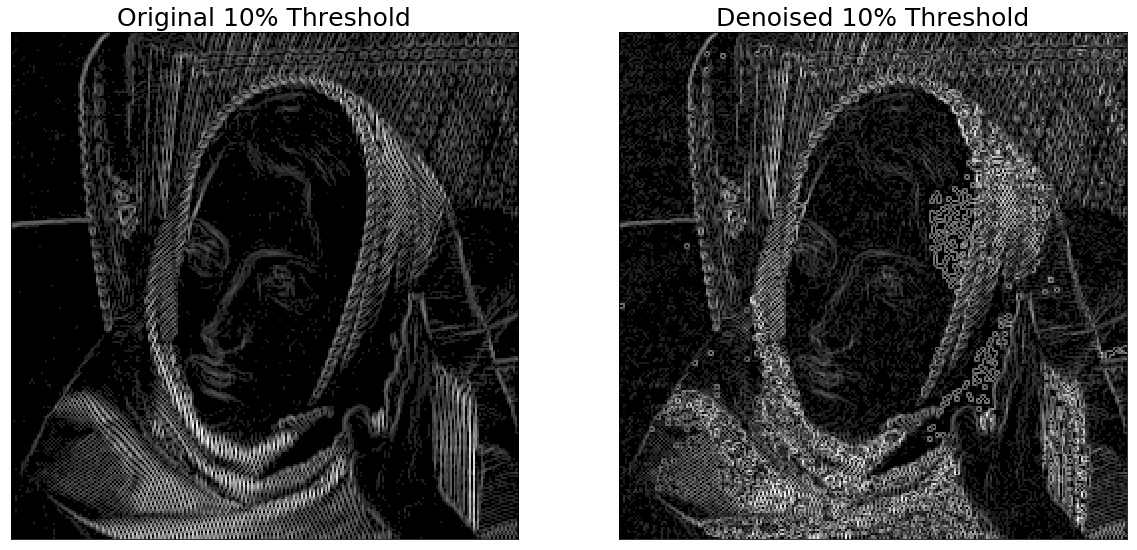

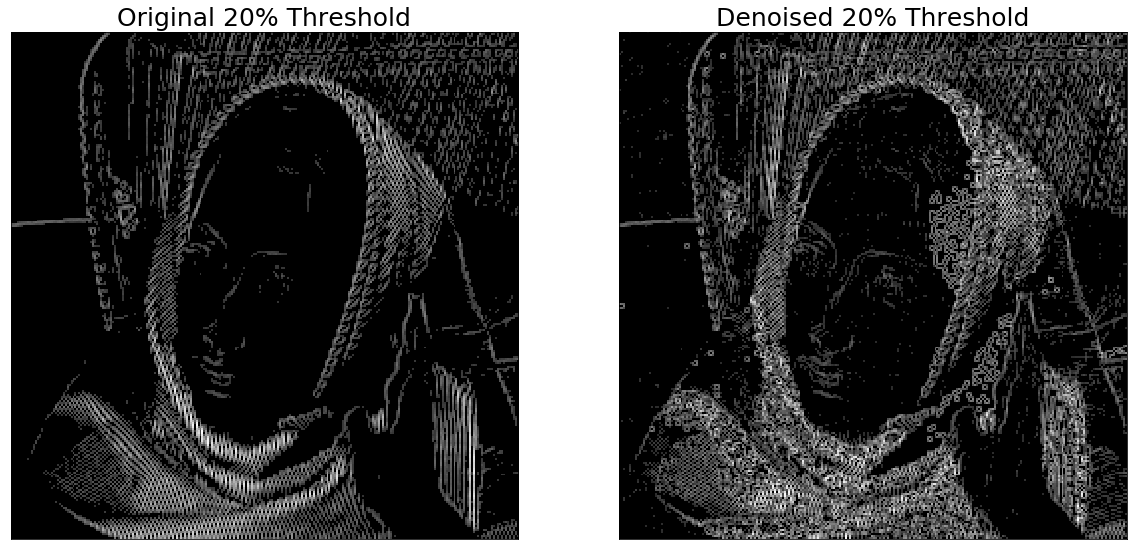

In [6]:
# First read the image
woman_pic = cv2.imread('woman.png', cv2.IMREAD_GRAYSCALE)
filter_size = 3
# Apply box filter on woman image
kernel = np.ones((filter_size,filter_size), dtype = np.float32)/(filter_size*filter_size)
filtered_woman_pic = cv2.filter2D(woman_pic, -1, kernel)

# Sharpen the image
sharpened_woman_pic = woman_pic + (woman_pic - filtered_woman_pic)

# Follow the same procedure as above, get the gradients, then the magnitude
# then apply the threshold.

# Gradients
woman_pic_x = cv2.Sobel(woman_pic, cv2.CV_64F, 1, 0, ksize = 3)
woman_pic_y = cv2.Sobel(woman_pic, cv2.CV_64F, 0, 1, ksize = 3)

sharpened_woman_pic_x = cv2.Sobel(sharpened_woman_pic, cv2.CV_64F, 1, 0, ksize = 3)
sharpened_woman_pic_y = cv2.Sobel(sharpened_woman_pic, cv2.CV_64F, 0, 1, ksize = 3)

# Magnitude
woman_pic_mag = cv2.magnitude(woman_pic_x, woman_pic_y)
sharpened_woman_pic_mag = cv2.magnitude(sharpened_woman_pic_x, sharpened_woman_pic_y)

# Thresholds
# Apply threshold
max_response = np.max(woman_pic_mag)

_, woman_pic_10 = cv2.threshold(woman_pic_mag, max_response*0.1, 255, cv2.THRESH_TOZERO)
_, woman_pic_20 = cv2.threshold(woman_pic_mag, max_response*0.2, 255, cv2.THRESH_TOZERO)

_, sharpened_woman_pic_10 = cv2.threshold(sharpened_woman_pic_mag, max_response*0.1, 255, cv2.THRESH_TOZERO)
_, sharpened_woman_pic_20 = cv2.threshold(sharpened_woman_pic_mag, max_response*0.2, 255, cv2.THRESH_TOZERO)

# Plot output

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(woman_pic_10, cmap='gray')
plt.title("Original 10% Threshold", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(sharpened_woman_pic_10, cmap='gray')
plt.title("Denoised 10% Threshold", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.show()
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(woman_pic_20, cmap='gray')
plt.title("Original 20% Threshold", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(sharpened_woman_pic_20, cmap='gray')
plt.title("Denoised 20% Threshold", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.show()

### Comment on results:
As seen from the outputs above, denoising helped improve edge detection. This is in agreement with what we would expect since noise severly affects the gradient of the pixels, the evaluation of which allows the sobel edge detection algorithm to work. By denoising, we reduce the negative effect of noise on the evaluation of the gradient which leads us to more accurate edge detection.